In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
"""

apr = pd.read_csv(r"CDP\Apr-2020Filtered.csv")
dec = pd.read_csv(r"CDP\Dec-2019Filtered.csv")
feb = pd.read_csv(r"CDP\Feb-2020Filtered.csv")
jan = pd.read_csv(r"CDP\Jan-2020Filtered.csv")
mar = pd.read_csv(r"CDP\Mar-2020Filtered.csv")
nov = pd.read_csv(r"CDP\Nov-2019Filtered.csv")
oct = pd.read_csv(r"CDP\Oct-2019Filtered.csv")

# Merge them
df = pd.concat([oct, nov, dec, jan, feb, mar, apr], ignore_index=True)

# Convert event_time to datetime
df["event_time"] = pd.to_datetime(df["event_time"])

# Sort by event_time
df = df.sort_values("event_time").reset_index(drop=True)

# Save merged file
df.to_csv("CDP/MergedFiltered.csv", index=False)

"""

In [2]:
df = pd.read_csv(r"CDP\MergedFiltered.csv")

In [3]:
# Convert event_time to datetime
df["event_time"] = pd.to_datetime(df["event_time"])

# Format to YYYY-MM-DD only
df["event_time"] = df["event_time"].dt.strftime("%Y-%m-%d")

In [6]:
df = df.dropna(subset=["category_code"])

In [7]:
df.shape

(6080764, 9)

In [8]:
df["user_id"].nunique()

1888883

In [9]:
df["product_id"].nunique()

123063

In [13]:
df["user_session"].nunique()

4823244

In [12]:
df["category_code"].nunique()

140

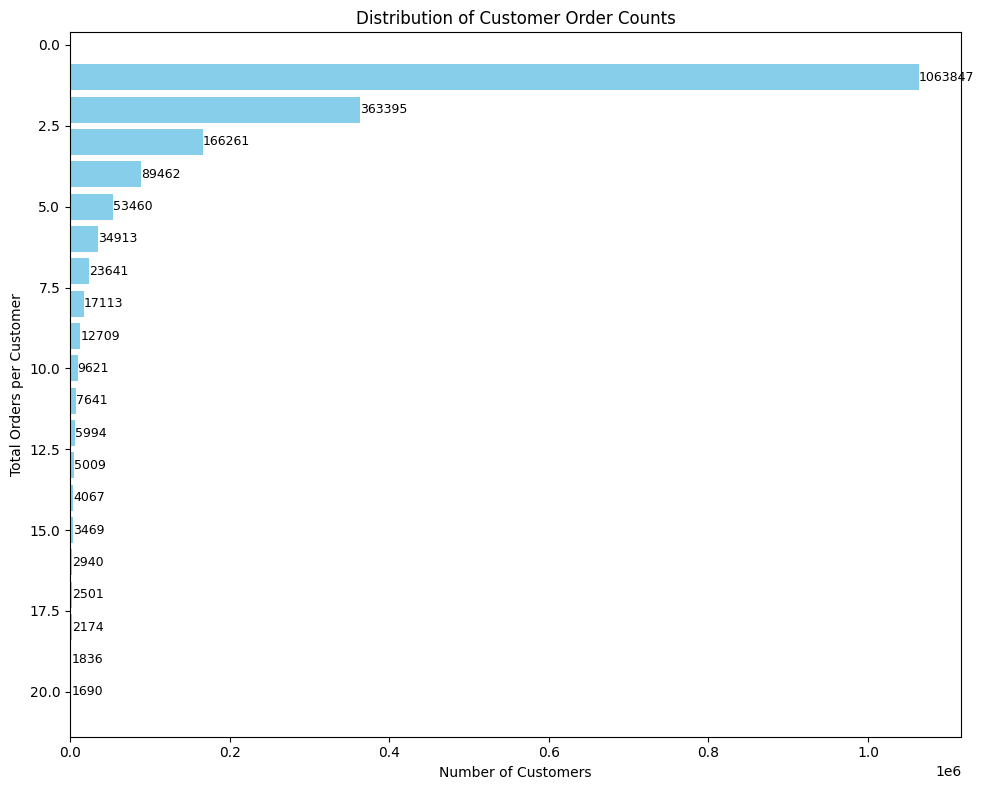

In [11]:
# Count unique order-dates per customer
customer_orders = df.groupby("user_id")["user_session"].nunique()

# Get frequency distribution
order_frequency = customer_orders.value_counts().sort_index()

# Convert to DataFrame
order_frequency_df = order_frequency.reset_index()
order_frequency_df.columns = ["total_orders", "num_customers"]


# Keep only rows where total_orders <= 20
plot_df = order_frequency_df[order_frequency_df["total_orders"] <= 20]

plt.figure(figsize=(10,8))

# Horizontal bar plot
bars = plt.barh(plot_df["total_orders"], plot_df["num_customers"], color='skyblue')

# Labels and title
plt.ylabel("Total Orders per Customer")
plt.xlabel("Number of Customers")
plt.title("Distribution of Customer Order Counts")

# Add value labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, str(width), 
             va='center', fontsize=9)

plt.gca().invert_yaxis()  # optional: highest order count on top
plt.tight_layout()
plt.show()

In [11]:
# Add a column for total orders contributed
order_frequency_df["total_orders_contributed"] = (
    order_frequency_df["total_orders"] * order_frequency_df["num_customers"]
)

# Sum it up
total_orders_check = order_frequency_df["total_orders_contributed"].sum()

print("Sum of total_orders × num_customers:", total_orders_check)

Sum of total_orders × num_customers: 4823245


In [12]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
3,2019-10-01,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
4,2019-10-01,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
5,2019-10-01,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
